<a href="https://colab.research.google.com/github/MLDreamer/AIMathematicallyexplained/blob/main/Word_Embeddings_Mathematical_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WORD EMBEDDINGS MATHEMATICAL PLAYGROUND

CHAPTER 1: DICTIONARY STORAGE ANALYSIS
Traditional Dictionary Analysis:
Vocabulary size: 50,000
Total definition words: 1,000,000
Bits per word (one-hot): 15.6
Total storage: 780,482 bits

Embedding Storage Analysis:
Embedding dimensions: 300
Bits per embedding: 9600
Total storage: 480,000,000 bits

Compression Analysis:
Compression ratio: 0.00x
Storage reduction: -61400.5%

CHAPTER 2: INFORMATION THEORY
Shannon Information Analysis:
Word		Freq	Prob		Info (bits)
--------------------------------------------------
the       	70000	0.244277	2.03
king      	  100	0.000349	11.48
queen     	   80	0.000279	11.81
royal     	   50	0.000174	12.48
crown     	   30	0.000105	13.22

Total Shannon Entropy: 3.68 bits per word
This means each word carries 3.68 bits of information on average

CHAPTER 3: CO-OCCURRENCE MATRIX & SVD
Co-occurrence Matrix Analysis:
Vocabulary size: 27
Matrix shape: (27, 27)

Top word pairs by co-occurrence:
(a, wore): 4.0
(ruled, the)

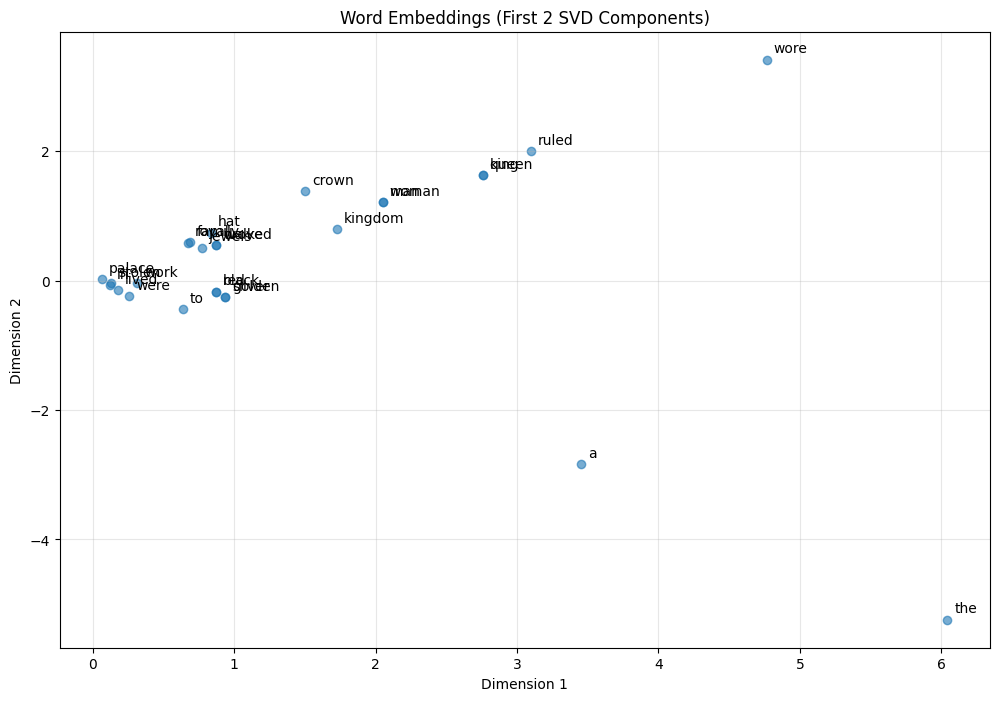

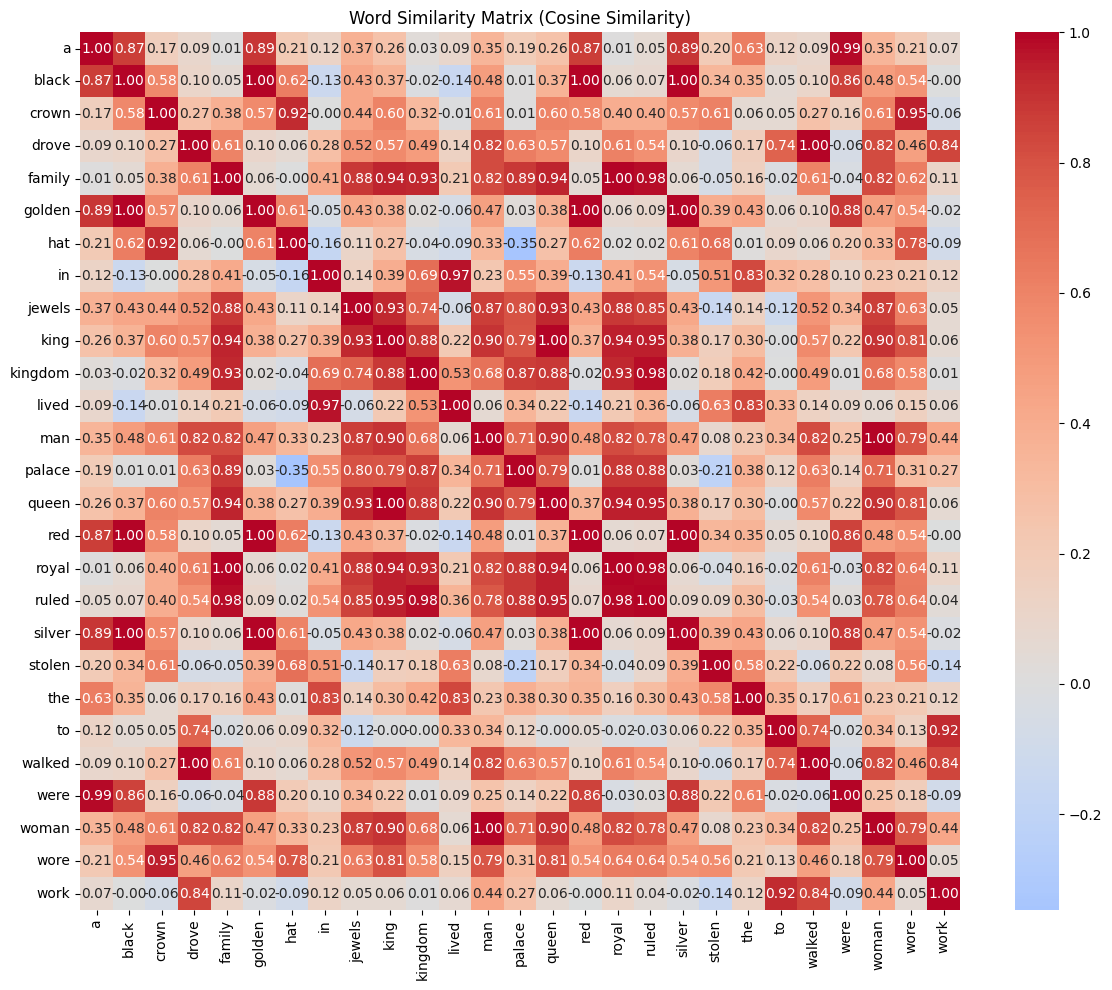


Analysis complete! The mathematics of embeddings revealed.


In [1]:

# Companion code for "Embeddings are Just Compressed Dictionaries"

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import math

# =============================================================================
# Chapter 1: Dictionary Storage Analysis
# =============================================================================

class DictionaryAnalyzer:
    """Analyze traditional dictionary storage vs embedding compression"""

    def __init__(self):
        self.vocab_size = 50000
        self.avg_definition_length = 20
        self.embedding_dim = 300

    def traditional_storage_analysis(self):
        """Calculate traditional dictionary storage requirements"""
        total_words = self.vocab_size * self.avg_definition_length
        bits_per_word = np.log2(self.vocab_size)  # One-hot encoding
        total_bits = self.vocab_size * bits_per_word

        print("Traditional Dictionary Analysis:")
        print(f"Vocabulary size: {self.vocab_size:,}")
        print(f"Total definition words: {total_words:,}")
        print(f"Bits per word (one-hot): {bits_per_word:.1f}")
        print(f"Total storage: {total_bits:,.0f} bits")
        return total_bits

    def embedding_storage_analysis(self):
        """Calculate embedding storage requirements"""
        bits_per_float = 32
        embedding_bits = self.embedding_dim * bits_per_float
        total_bits = self.vocab_size * embedding_bits

        print("\nEmbedding Storage Analysis:")
        print(f"Embedding dimensions: {self.embedding_dim}")
        print(f"Bits per embedding: {embedding_bits}")
        print(f"Total storage: {total_bits:,.0f} bits")
        return total_bits

    def compression_analysis(self):
        """Compare compression ratios"""
        traditional = self.traditional_storage_analysis()
        embedding = self.embedding_storage_analysis()

        compression_ratio = traditional / embedding
        print(f"\nCompression Analysis:")
        print(f"Compression ratio: {compression_ratio:.2f}x")
        print(f"Storage reduction: {(1 - 1/compression_ratio)*100:.1f}%")

# =============================================================================
# Chapter 2: Shannon Entropy Calculations
# =============================================================================

class InformationTheoryCalculator:
    """Calculate Shannon entropy and information content"""

    def __init__(self):
        # Sample word frequencies from English corpus
        self.word_frequencies = {
            "the": 70000, "of": 36000, "and": 28000, "to": 26000,
            "a": 23000, "in": 21000, "is": 10000, "you": 9000,
            "that": 8000, "it": 7500, "he": 7000, "was": 6500,
            "for": 6000, "on": 5500, "are": 5000, "as": 4500,
            "with": 4000, "his": 3500, "they": 3000, "i": 2800,
            "king": 100, "queen": 80, "royal": 50, "crown": 30
        }
        self.total_words = sum(self.word_frequencies.values())

    def calculate_information_content(self, word):
        """Calculate Shannon information content for a word"""
        frequency = self.word_frequencies.get(word, 1)
        probability = frequency / self.total_words
        information = -np.log2(probability)
        return information

    def calculate_entropy(self):
        """Calculate Shannon entropy of word distribution"""
        entropy = 0
        for word, freq in self.word_frequencies.items():
            probability = freq / self.total_words
            if probability > 0:
                entropy -= probability * np.log2(probability)
        return entropy

    def information_analysis(self):
        """Analyze information content of different words"""
        print("Shannon Information Analysis:")
        print("Word\t\tFreq\tProb\t\tInfo (bits)")
        print("-" * 50)

        sample_words = ["the", "king", "queen", "royal", "crown"]
        for word in sample_words:
            freq = self.word_frequencies[word]
            prob = freq / self.total_words
            info = self.calculate_information_content(word)
            print(f"{word:10}\t{freq:5}\t{prob:.6f}\t{info:.2f}")

        total_entropy = self.calculate_entropy()
        print(f"\nTotal Shannon Entropy: {total_entropy:.2f} bits per word")
        print(f"This means each word carries {total_entropy:.2f} bits of information on average")

# =============================================================================
# Chapter 3: Co-occurrence Matrix and SVD
# =============================================================================

class CooccurrenceAnalyzer:
    """Build and analyze word co-occurrence matrices"""

    def __init__(self):
        # Simple corpus for demonstration
        self.corpus = [
            "the king wore a golden crown",
            "the queen wore a silver crown",
            "the man wore a black hat",
            "the woman wore a red hat",
            "the king ruled the kingdom",
            "the queen ruled the kingdom",
            "the royal family lived in palace",
            "the crown jewels were stolen",
            "the man walked to work",
            "the woman drove to work"
        ]

        self.vocab = self._build_vocabulary()
        self.word_to_idx = {word: idx for idx, word in enumerate(self.vocab)}
        self.cooc_matrix = None

    def _build_vocabulary(self):
        """Build vocabulary from corpus"""
        words = []
        for sentence in self.corpus:
            words.extend(sentence.lower().split())
        return sorted(list(set(words)))

    def build_cooccurrence_matrix(self, window_size=2):
        """Build co-occurrence matrix with given window size"""
        vocab_size = len(self.vocab)
        cooc_matrix = np.zeros((vocab_size, vocab_size))

        for sentence in self.corpus:
            words = sentence.lower().split()
            for i, target_word in enumerate(words):
                target_idx = self.word_to_idx[target_word]

                # Look at context window
                start = max(0, i - window_size)
                end = min(len(words), i + window_size + 1)

                for j in range(start, end):
                    if i != j:  # Don't count word with itself
                        context_word = words[j]
                        context_idx = self.word_to_idx[context_word]
                        cooc_matrix[target_idx][context_idx] += 1

        self.cooc_matrix = cooc_matrix
        return cooc_matrix

    def analyze_cooccurrence(self):
        """Analyze co-occurrence patterns"""
        if self.cooc_matrix is None:
            self.build_cooccurrence_matrix()

        print("Co-occurrence Matrix Analysis:")
        print(f"Vocabulary size: {len(self.vocab)}")
        print(f"Matrix shape: {self.cooc_matrix.shape}")

        # Show top co-occurrences
        print("\nTop word pairs by co-occurrence:")
        pairs = []
        for i in range(len(self.vocab)):
            for j in range(i+1, len(self.vocab)):
                if self.cooc_matrix[i][j] > 0:
                    pairs.append((self.vocab[i], self.vocab[j], self.cooc_matrix[i][j]))

        pairs.sort(key=lambda x: x[2], reverse=True)
        for word1, word2, count in pairs[:10]:
            print(f"({word1}, {word2}): {count}")

    def perform_svd(self, n_components=5):
        """Perform SVD on co-occurrence matrix"""
        if self.cooc_matrix is None:
            self.build_cooccurrence_matrix()

        # Add small constant to avoid issues with zeros
        matrix = self.cooc_matrix + 0.01

        # Apply SVD
        svd = TruncatedSVD(n_components=n_components)
        embeddings = svd.fit_transform(matrix)

        print(f"\nSVD Analysis:")
        print(f"Original matrix shape: {matrix.shape}")
        print(f"Embedding shape: {embeddings.shape}")
        print(f"Explained variance ratio: {svd.explained_variance_ratio_}")
        print(f"Total variance explained: {sum(svd.explained_variance_ratio_):.3f}")

        return embeddings, svd

# =============================================================================
# Chapter 4: Embedding Mathematics
# =============================================================================

class EmbeddingMathematics:
    """Demonstrate core embedding mathematical operations"""

    def __init__(self, embeddings, vocab):
        self.embeddings = embeddings
        self.vocab = vocab
        self.word_to_idx = {word: idx for idx, word in enumerate(vocab)}

    def cosine_similarity_calculation(self, word1, word2):
        """Calculate cosine similarity between two words"""
        if word1 not in self.word_to_idx or word2 not in self.word_to_idx:
            return None

        idx1 = self.word_to_idx[word1]
        idx2 = self.word_to_idx[word2]

        vec1 = self.embeddings[idx1]
        vec2 = self.embeddings[idx2]

        # Cosine similarity formula
        dot_product = np.dot(vec1, vec2)
        norm1 = np.linalg.norm(vec1)
        norm2 = np.linalg.norm(vec2)

        if norm1 == 0 or norm2 == 0:
            return 0

        similarity = dot_product / (norm1 * norm2)
        return similarity

    def find_most_similar(self, word, top_k=5):
        """Find most similar words to given word"""
        if word not in self.word_to_idx:
            return []

        similarities = []
        for other_word in self.vocab:
            if other_word != word:
                sim = self.cosine_similarity_calculation(word, other_word)
                if sim is not None:
                    similarities.append((other_word, sim))

        similarities.sort(key=lambda x: x[1], reverse=True)
        return similarities[:top_k]

    def word_analogy(self, word_a, word_b, word_c):
        """Perform word analogy: word_a - word_b + word_c = ?"""
        if not all(w in self.word_to_idx for w in [word_a, word_b, word_c]):
            return None

        # Get embedding vectors
        vec_a = self.embeddings[self.word_to_idx[word_a]]
        vec_b = self.embeddings[self.word_to_idx[word_b]]
        vec_c = self.embeddings[self.word_to_idx[word_c]]

        # Compute analogy vector
        analogy_vector = vec_a - vec_b + vec_c

        # Find most similar word to analogy vector
        best_similarity = -1
        best_word = None

        for word in self.vocab:
            if word not in [word_a, word_b, word_c]:
                word_vec = self.embeddings[self.word_to_idx[word]]
                sim = np.dot(analogy_vector, word_vec) / (
                    np.linalg.norm(analogy_vector) * np.linalg.norm(word_vec)
                )
                if sim > best_similarity:
                    best_similarity = sim
                    best_word = word

        return best_word, best_similarity

    def similarity_analysis(self):
        """Analyze similarity patterns in embeddings"""
        print("Embedding Similarity Analysis:")

        # Test word pairs
        test_pairs = [
            ("king", "queen"),
            ("king", "crown"),
            ("man", "woman"),
            ("the", "king"),
            ("wore", "crown")
        ]

        print("\nPairwise Similarities:")
        for word1, word2 in test_pairs:
            sim = self.cosine_similarity_calculation(word1, word2)
            if sim is not None:
                print(f"{word1:8} - {word2:8}: {sim:.3f}")

        # Find similar words
        print(f"\nWords most similar to 'king':")
        similar_to_king = self.find_most_similar("king")
        for word, sim in similar_to_king:
            print(f"{word:10}: {sim:.3f}")

# =============================================================================
# Chapter 5: Visualization and Analysis
# =============================================================================

def visualize_embeddings(embeddings, vocab, title="Word Embeddings"):
    """Visualize embeddings in 2D using first two dimensions"""
    plt.figure(figsize=(12, 8))

    # Use first two dimensions for visualization
    x = embeddings[:, 0]
    y = embeddings[:, 1] if embeddings.shape[1] > 1 else np.zeros_like(x)

    plt.scatter(x, y, alpha=0.6)

    # Label points
    for i, word in enumerate(vocab):
        plt.annotate(word, (x[i], y[i]), xytext=(5, 5),
                    textcoords='offset points', fontsize=10)

    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()

def create_similarity_heatmap(embeddings, vocab):
    """Create similarity heatmap between words"""
    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(embeddings)

    # Create heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(similarity_matrix,
                xticklabels=vocab,
                yticklabels=vocab,
                cmap='coolwarm',
                center=0,
                annot=True,
                fmt='.2f')
    plt.title('Word Similarity Matrix (Cosine Similarity)')
    plt.tight_layout()
    plt.show()

# =============================================================================
# Main Execution and Demonstration
# =============================================================================

def main():
    """Run complete embedding mathematical analysis"""

    print("=" * 60)
    print("WORD EMBEDDINGS MATHEMATICAL PLAYGROUND")
    print("=" * 60)

    # Chapter 1: Dictionary Analysis
    print("\n" + "="*40)
    print("CHAPTER 1: DICTIONARY STORAGE ANALYSIS")
    print("="*40)
    dict_analyzer = DictionaryAnalyzer()
    dict_analyzer.compression_analysis()

    # Chapter 2: Information Theory
    print("\n" + "="*40)
    print("CHAPTER 2: INFORMATION THEORY")
    print("="*40)
    info_calc = InformationTheoryCalculator()
    info_calc.information_analysis()

    # Chapter 3: Co-occurrence Analysis
    print("\n" + "="*40)
    print("CHAPTER 3: CO-OCCURRENCE MATRIX & SVD")
    print("="*40)
    cooc_analyzer = CooccurrenceAnalyzer()
    cooc_analyzer.analyze_cooccurrence()
    embeddings, svd_model = cooc_analyzer.perform_svd()

    # Chapter 4: Embedding Mathematics
    print("\n" + "="*40)
    print("CHAPTER 4: EMBEDDING MATHEMATICS")
    print("="*40)
    embedding_math = EmbeddingMathematics(embeddings, cooc_analyzer.vocab)
    embedding_math.similarity_analysis()

    # Test word analogy
    print(f"\nWord Analogy Test:")
    if "king" in cooc_analyzer.vocab and "queen" in cooc_analyzer.vocab and "man" in cooc_analyzer.vocab:
        result = embedding_math.word_analogy("king", "man", "woman")
        if result:
            word, similarity = result
            print(f"king - man + woman = {word} (similarity: {similarity:.3f})")

    # Chapter 5: Visualization
    print("\n" + "="*40)
    print("CHAPTER 5: VISUALIZATION")
    print("="*40)
    print("Generating visualizations...")

    # Visualize embeddings
    visualize_embeddings(embeddings, cooc_analyzer.vocab,
                        "Word Embeddings (First 2 SVD Components)")

    # Create similarity heatmap
    create_similarity_heatmap(embeddings, cooc_analyzer.vocab)

    print("\n" + "="*60)
    print("Analysis complete! The mathematics of embeddings revealed.")
    print("="*60)

if __name__ == "__main__":
    main()